In [ ]:
import gymnasium as gym
from minigrid.envs import FourRoomsEnv, LavaGapEnv, LockedRoomEnv
import time
from minigrid.rendering.rendering_manager import RenderingManager
from minigrid.rendering.smooth_rendering_manager import SmoothRenderingManager
import numpy as np

env = LockedRoomEnv(render_mode='human', rendering_manager=SmoothRenderingManager)

observation, info = env.reset()
for _ in range(250):

    rand = np.random.rand()
    action = 2

    if rand < 0.3:
        action = env.action_space.sample()

    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

    # pause for a few milliseconds before rendering the next frame
    time.sleep(0.05)
    
env.close()

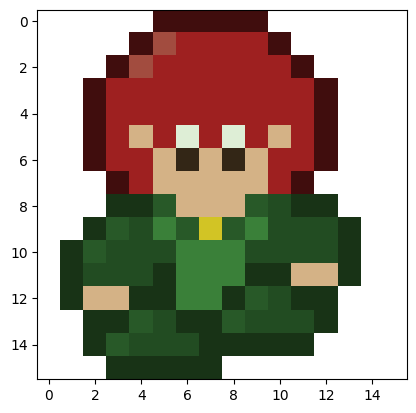

In [1]:
from minigrid.renderers.pretty_obj_renderers import extract_sprite_by_index
import numpy as np
import matplotlib.pyplot as plt


# display extracted sprite. sprite will be returned as a numpy array

def display_sprite(index):
    sprite = extract_sprite_by_index("figures/sprites/Players.png", 16, 16, index)
    plt.imshow(sprite)
    plt.show()


display_sprite(112)


In [30]:
from minigrid.core.world_object import Ball
import ctypes
import numpy as np

# Original grid: a 3x3 list of Ball objects
grid = [[Ball() for _ in range(3)] for _ in range(3)]

# Create a flat NumPy array of ctypes pointers to the objects in the grid
pointer_array = np.empty((3, 3), dtype=object)
for i in range(3):
    for j in range(3):
        pointer_array[i, j] = ctypes.pointer(ctypes.py_object(grid[i][j]))

print("Original color:", grid[0][0].color)

# Access and modify elements in the grid
grid[0][0] = Ball(color="red")

# Access elements via the pointer array
print("Direct grid access:", grid[0][0].color)  # Should print "red"
print("Pointer array access:", pointer_array[0, 0].contents.value.color)  # Should also print "red"



Original color: blue
Direct grid access: red
Pointer array access: blue


In [3]:
import numpy as np

# create a 3x3 grid of numbers from 0 to 8
grid = np.arange(9).reshape(3, 3)

print("Original grid:")
print(grid)

# Create view of subset of the grid
view = grid[1:, 1:].view()

# Modify the view
view[0, 0] = 100

print("Modified grid:")
print(grid)

print("View:")
print(view)

Original grid:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Modified grid:
[[  0   1   2]
 [  3 100   5]
 [  6   7   8]]
View:
[[100   5]
 [  7   8]]


In [1]:
import pyglet as pg

# Create a window
window = pg.window.Window()

# Create a label
label = pg.text.Label('Hello, world',
                      font_name='Times New Roman',
                      font_size=36,
                      x=window.width // 2, y=window.height // 2,
                      anchor_x='center', anchor_y='center')

# Sprite with basic image
image = pg.image.load('figures/sprites/Chest_Open_Filled.png')
sprite = pg.sprite.Sprite(image, x=100, y=0)

# Load the sprite sheet
chest_opening_sheet = pg.image.load('figures/sprites/Chest_Open_Empty.png')

# Create animation frames
frames = []
for i in range(4):
    frame_image = chest_opening_sheet.get_region(i * 16, 0, 16, 16)
    animation_frame = pg.image.AnimationFrame(frame_image, duration=0.1)  # Set a duration for each frame
    frames.append(animation_frame)

# Create animation
animation = pg.image.Animation(frames)

# Create animated sprite
anim_sprite = pg.sprite.Sprite(animation, x=200, y=0)

# Function to render all sprites
def render_sprites():
    window.clear()
    label.draw()
    sprite.draw()
    anim_sprite.draw()

# Event to draw the window
@window.event
def on_draw():
    render_sprites()

# Example of calling the render function
def main_loop():
    for _ in range(4):
        render_sprites()
        pg.clock.tick( 60 )

# Run the application
pg.app.run()

# Call the main loop to render the sprites
main_loop()

GLException: (0x1282): Invalid operation. The specified operation is not allowed in the current state.

In [4]:
# close all windows
pg.app.exit()